In [1]:
from skimage.feature import Cascade
from skimage import data
import matplotlib.pyplot as plt
from matplotlib import patches
import PIL
import requests
from io import BytesIO
import sys
import numpy as np

In [3]:
# Load the trained file from the module root.
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade.
detector = Cascade(trained_file)

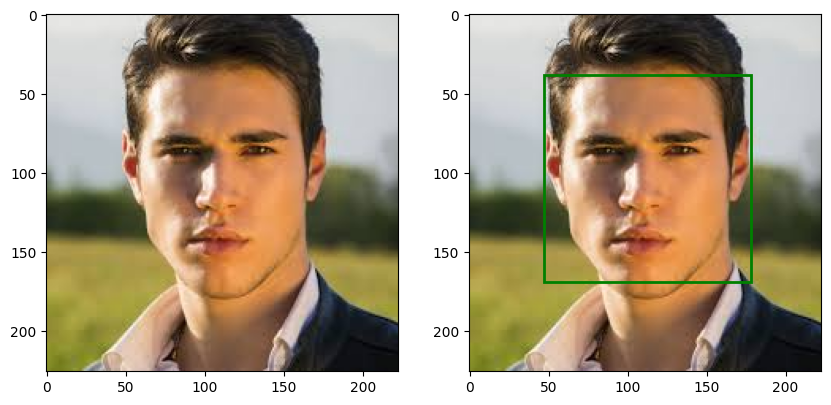

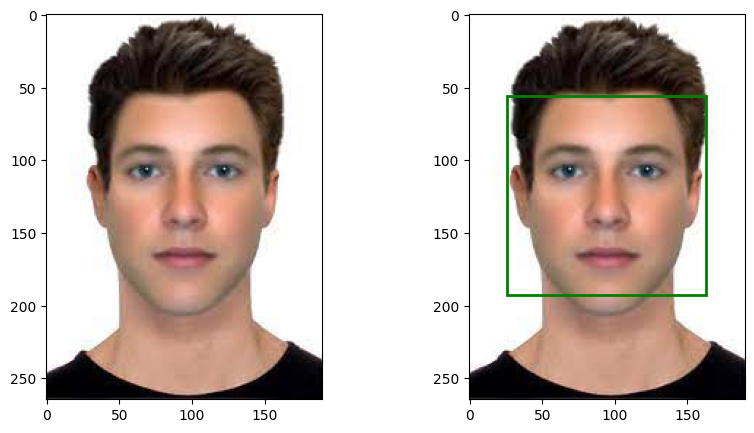

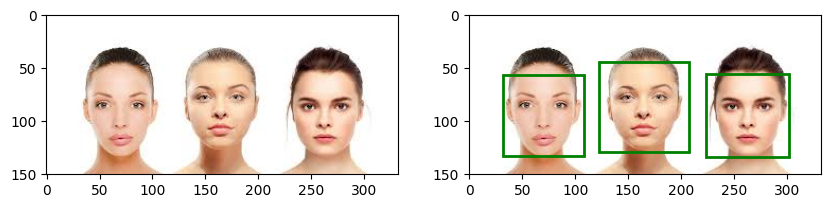

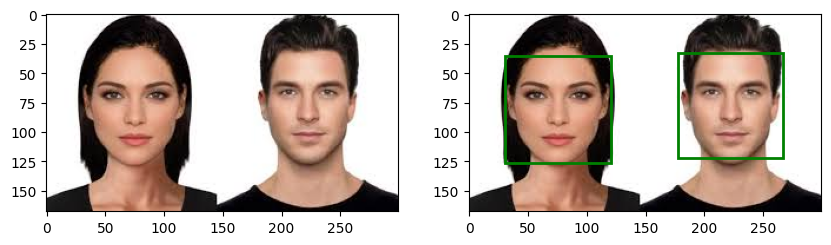

In [5]:
image_list =["https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRbJiyFMxpDDjQRtO3MERzQKsDqzE7uT7WT2w&usqp=CAU",
             "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQMSXyOCajcgK45ZQ0XFOYXIiVFSpcYwdCE_JUNJ1ZtsAOvdw8a9Tnj8Eca3e4WJDi-Gks&usqp=CAU",
             "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQfhfFzG3DayRtTBtWGLqOzXCYSZvfpg2h08w&usqp=CAU",
             "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRgwltpUQ1pCW5lxgA3UpB9pVABKrCN9CkThw&usqp=CAU"] 

for item in image_list:

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Load the image
    url = item
    response = requests.get(url)
    img = PIL.Image.open(BytesIO(response.content))
    image = np.array(img)
    # find faces
    detected = detector.detect_multi_scale(img=image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(60, 60),
                                       max_size=(2048, 2048))

    plt.imshow(img)
    img_desc = plt.gca()
    plt.set_cmap('gray')

    for patch in detected:
        rect = patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='g',
                linewidth=2
            )

        img_desc.add_patch(rect)

    axs[0].imshow(image)
    axs[1].imshow(img)

    plt.show()



-This code creates a variable called trained_file that assigns the file path of the pre-trained LBP neural network model for face detection in images using the data.lbp_frontal_face_cascade_filename() function from the dlib library.


-The skimage.feature package contains tools for extracting image features .

-We can use the Cascade class as one of the tools in the skimage.feature library to recognize faces using the LBP model. By using this class and the desired cascade classifier model file, we can recognize the desired objects in the images.

To use the Cascade class, you must first download the desired cascade classifier model file. Then, using the Cascade method and giving the model file path, we create an object of the Cascade class for face recognition. Then, using the detect_multi_scale method, we can check the images and recognize the faces in them.

-In this code, ``Cascade'' class in ``skimage.feature'' library is used for face recognition using LBP model. By calling the `detect_multi_scale' method on the `detector' object and giving the image `img' as input, it detects the faces in the image.

The `scale_factor' parameter specifies the ratio of the size of each block to the size of the previous block. Here, its value is set to 1.2, which means a 20% increase in block size per step.

The step_ratio parameter specifies the ratio of the size of each block to the size of its adjacent pixels. Here, its value is set to 1, which means using adjacent pixels to detect blocks.

The `min_size' parameter is the minimum size of blocks to be detected in the image. Here, its value is set to (60, 60).

The `max_size' parameter is the maximum size of the blocks to be detected in the image. Here, its value is set to (123, 123).

By calling this method, a list of tuples is returned as `(y, x, h, w)', each tuple representing the coordinates and size of a detected face. For example, if `detected' is equal to `[(100, 200, 50, 50), (300, 400, 60, 60)]', this means that in the image, two faces with coordinates `(100 , 200)' and size (50, 50) and (300, 400) and size (60, 60) have been detected.

-`plt.gca()` is a function from the `matplotlib.pyplot` library that uses the current `Axes` object of the `matplotlib` library for the current image. `gca` stands for Get Current Axes and returns the current `Axes` object for the current `matplotlib` image.

In fact, the current `matplotlib` image contains a `Figure` object and one or more `Axes` objects. ``plt.gca()'' function returns the current ``Axes'' object from the current ``matplotlib'' image and we can use it to perform various graphical operations such as drawing lines, rectangles, circles, etc. In other words, by using ``plt.gca()'' function, we can access the current ``Axes'' object and perform various operations on it.